In [2]:
import pandas as pd

# Load the datasets
game_events_df = pd.read_csv('/kaggle/input/player-scores/game_events.csv')
players_df = pd.read_csv('/kaggle/input/player-scores/players.csv')

# Filtering for relevant events
goals_df = game_events_df[game_events_df['type'] == 'Goals']
assists_df = game_events_df[game_events_df['player_assist_id'].notna()]
cards_df = game_events_df[game_events_df['type'] == 'Cards']

# Counting events by player
goals_count = goals_df['player_id'].value_counts().rename('goals')
assists_count = assists_df['player_assist_id'].value_counts().rename('assists')
cards_count = cards_df['player_id'].value_counts().rename('cards')

# Merging counts into a single DataFrame
player_performance_df = pd.concat([goals_count, assists_count, cards_count], axis=1).fillna(0)
player_performance_df.reset_index(inplace=True)
player_performance_df.rename(columns={'index': 'player_id'}, inplace=True)

# Simplify the players DataFrame to include only player_id and name
players_simple_df = players_df[['player_id', 'name']]

# Merging to get top performers with names

# Top goal scorers
top_goal_scorers = player_performance_df.sort_values(by='goals', ascending=False).head(10)
top_goal_scorers_with_names = pd.merge(top_goal_scorers, players_simple_df, on='player_id', how='left')

# Top assist providers
top_assist_providers = player_performance_df.sort_values(by='assists', ascending=False).head(10)
top_assist_providers_with_names = pd.merge(top_assist_providers, players_simple_df, on='player_id', how='left')

# Players with the most cards
players_most_cards = player_performance_df.sort_values(by='cards', ascending=False).head(10)
players_most_cards_with_names = pd.merge(players_most_cards, players_simple_df, on='player_id', how='left')

# Printing the results
print("Top Goal Scorers:\n", top_goal_scorers_with_names)
print("\nTop Assist Providers:\n", top_assist_providers_with_names)
print("\nPlayers with the Most Cards:\n", players_most_cards_with_names)


Top Goal Scorers:
    player_id  goals  assists  cards                       name
0    38253.0  449.0     32.0   13.0         Robert Lewandowski
1    28003.0  443.0     32.0    5.0               Lionel Messi
2     8198.0  433.0     33.0   22.0          Cristiano Ronaldo
3   132098.0  294.0     11.0    1.0                 Harry Kane
4    44352.0  283.0     33.0   17.0                Luis Suárez
5    18922.0  279.0     38.0    3.0              Karim Benzema
6    58864.0  275.0     21.0    8.0  Pierre-Emerick Aubameyang
7   148455.0  251.0     16.0    4.0              Mohamed Salah
8   105521.0  249.0      7.0   23.0              Ciro Immobile
9    96341.0  247.0     16.0    8.0              Romelu Lukaku

Top Assist Providers:
    player_id  goals  assists  cards               name
0    45320.0  113.0     44.0   17.0     Ángel Di María
1    36139.0  169.0     42.0   12.0        Dusan Tadic
2    69633.0   92.0     41.0    6.0  Christian Eriksen
3    35207.0  167.0     41.0   14.0         

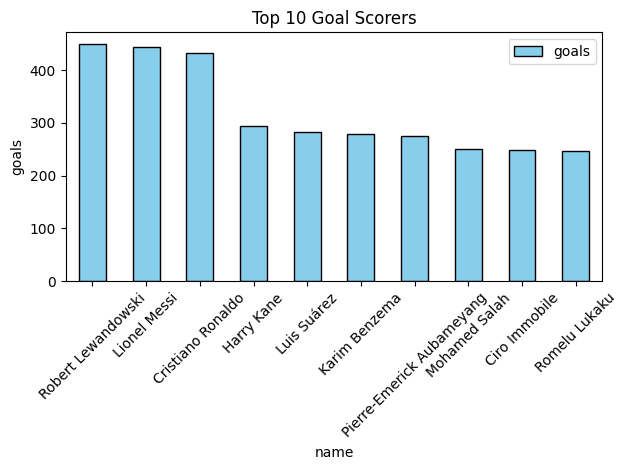

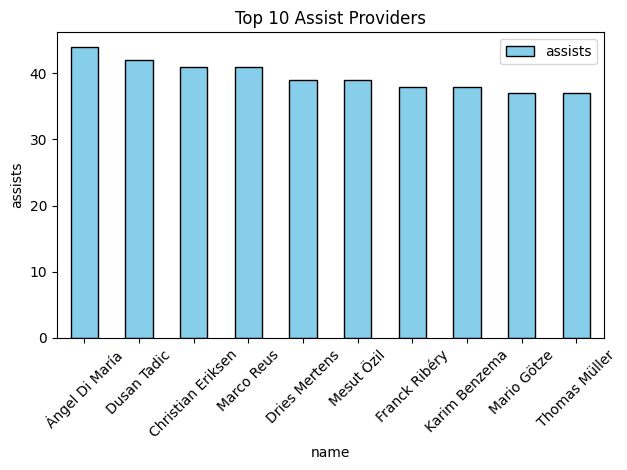

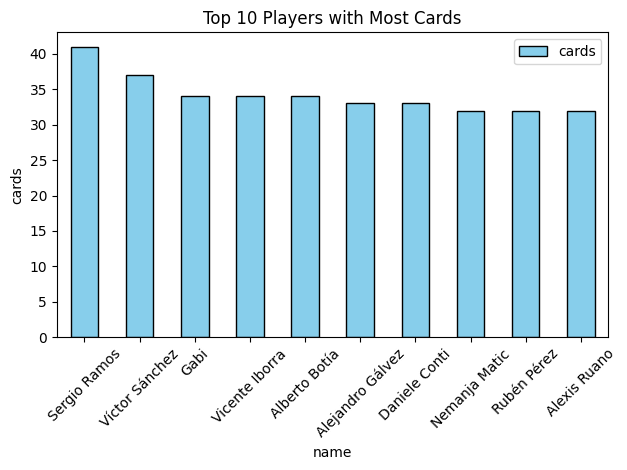

In [3]:
import matplotlib.pyplot as plt

# Function to plot the data
def plot_performance(data, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    data.plot(kind='bar', x=xlabel, y=ylabel, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Top Goal Scorers Plot
plot_performance(top_goal_scorers_with_names, 'Top 10 Goal Scorers', 'name', 'goals')

# Top Assist Providers Plot
plot_performance(top_assist_providers_with_names, 'Top 10 Assist Providers', 'name', 'assists')

# Players with Most Cards Plot
plot_performance(players_most_cards_with_names, 'Top 10 Players with Most Cards', 'name', 'cards')

plt.show()
